In [1]:
# pip install imbalanced learning

In [2]:
# pip install lime

In [3]:
import sys
import sklearn
import os
import lime

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn import metrics
from sklearn.metrics import make_scorer,roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("data.csv")
data = df
data1 = df

In [5]:
data.head(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [6]:
data.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

0    6599
1     220
Name: Bankrupt?, dtype: int64

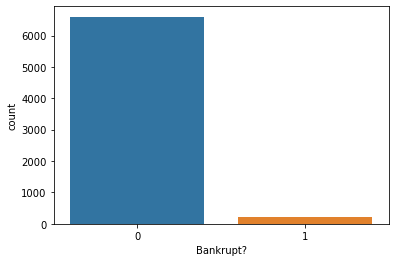

In [7]:
sns.countplot(x='Bankrupt?', data=data)
data['Bankrupt?'].value_counts()

In [8]:
X = data.drop(['Bankrupt?'],axis=1)
y = data['Bankrupt?']

# SMOTE + Undersampling

In [10]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
ys_train.value_counts()

0    4631
1     142
Name: Bankrupt?, dtype: int64

In [11]:
#from collections import Counter
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
counter = Counter(ys_train)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
Xs_train, ys_train = pipeline.fit_resample(Xs_train, ys_train)
# summarize the new class distribution
counter = Counter(ys_train)
print(counter)
ys_train.value_counts()


Counter({0: 4631, 1: 142})
Counter({0: 2315, 1: 1389})


0    2315
1    1389
Name: Bankrupt?, dtype: int64

In [12]:
column_list =  Xs_train.columns
Xs_train

ROA(C) before interest and depreciation before interest  \
0                                              0.498562          
1                                              0.613903          
2                                              0.486131          
3                                              0.495491          
4                                              0.613221          
...                                                 ...          
3699                                           0.451028          
3700                                           0.426345          
3701                                           0.418926          
3702                                           0.439239          
3703                                           0.449449          

       ROA(A) before interest and % after tax  \
0                                    0.557894   
1                                    0.696195   
2                                    0.554623   
3                                    0.558657   
4                                    0.667412   
...                                       ...   
3699                                 0.504799   
3700                                 0.500741   
3701                                 0.463773   
3702                                 0.459925   
3703                                 0.501742   

       ROA(B) before interest and depreciation after tax  \
0                                              0.548102    
1                                              0.683602    
2                                              0.529150    
3                                              0.541464    
4                                              0.649339    
...                                                 ...    
3699                                           0.500110    
3700                                           0.472788    
3701                                           0.458097    
3702                                           0.480402    
3703                                           0.497990    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.598892                      0.598892   
1                    0.608808                      0.608808   
2                    0.608426                      0.608426   
3                    0.600809                      0.600809   
4                    0.623993                      0.622905   
...                       ...                           ...   
3699                 0.593362                      0.593362   
3700                 0.598509                      0.598743   
3701                 0.597691                      0.597691   
3702                 0.596862                      0.596883   
3703                 0.593163                      0.593163   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.999005                    0.797491   
1                   0.999113                    0.797549   
2                   0.999017                    0.797477   
3                   0.999006                    0.797412   
4                   0.999362                    0.798191   
...                      ...                         ...   
3699                0.998774                    0.797075   
3700                0.998976                    0.797092   
3701                0.998832                    0.796952   
3702                0.998936                    0.797169   
3703                0.998759                    0.797039   

       After-tax net Interest Rate  \
0                         0.809415   
1                         0.809471   
2                         0.809368   
3                         0.809330   
4                         0.809927   
...                            ...   
3699                      0.808997   
3700                      0.809034   
3701                      0.808882   
3702                      0.809108   
3703    

## MUTUAL INFORMATION CLASSIFIER

In [13]:
#from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(Xs_train, ys_train)
mi

array([2.65810960e-01, 2.62469911e-01, 2.67739558e-01, 1.16262109e-01,
       1.13129404e-01, 1.70897372e-01, 2.74043134e-01, 2.79719614e-01,
       2.52514195e-01, 2.77651652e-01, 1.49047524e-02, 1.48945748e-01,
       1.25521798e-01, 1.83005691e-02, 9.47570557e-02, 2.11539479e-01,
       2.14411196e-01, 2.14385655e-01, 3.08112454e-01, 1.50992995e-01,
       1.75131126e-02, 2.52798793e-01, 3.04518228e-01, 6.97709542e-02,
       6.68275763e-02, 1.44455954e-01, 1.40706110e-01, 1.28737218e-01,
       2.51550547e-01, 1.57725256e-01, 8.23069360e-02, 4.39535187e-02,
       1.54664232e-01, 1.59475465e-01, 2.07661112e-01, 2.36736768e-01,
       2.13051753e-01, 2.13260301e-01, 4.67710502e-02, 2.72642375e-01,
       8.66731690e-02, 1.66705225e-01, 2.73553588e-01, 9.37495424e-02,
       3.26271039e-01, 3.25946665e-03, 1.97101899e-02, 1.01652668e-01,
       9.43114642e-02, 2.06128455e-01, 3.18509478e-02, 1.41911772e-01,
       6.39059725e-02, 1.45787404e-01, 4.10738275e-02, 2.15807128e-02,
      

In [14]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X,y,test_size=0.3,random_state=0)

Xm_train.shape, Xm_test.shape

((4773, 95), (2046, 95))

Text(0, 0.5, 'Mutual Information')

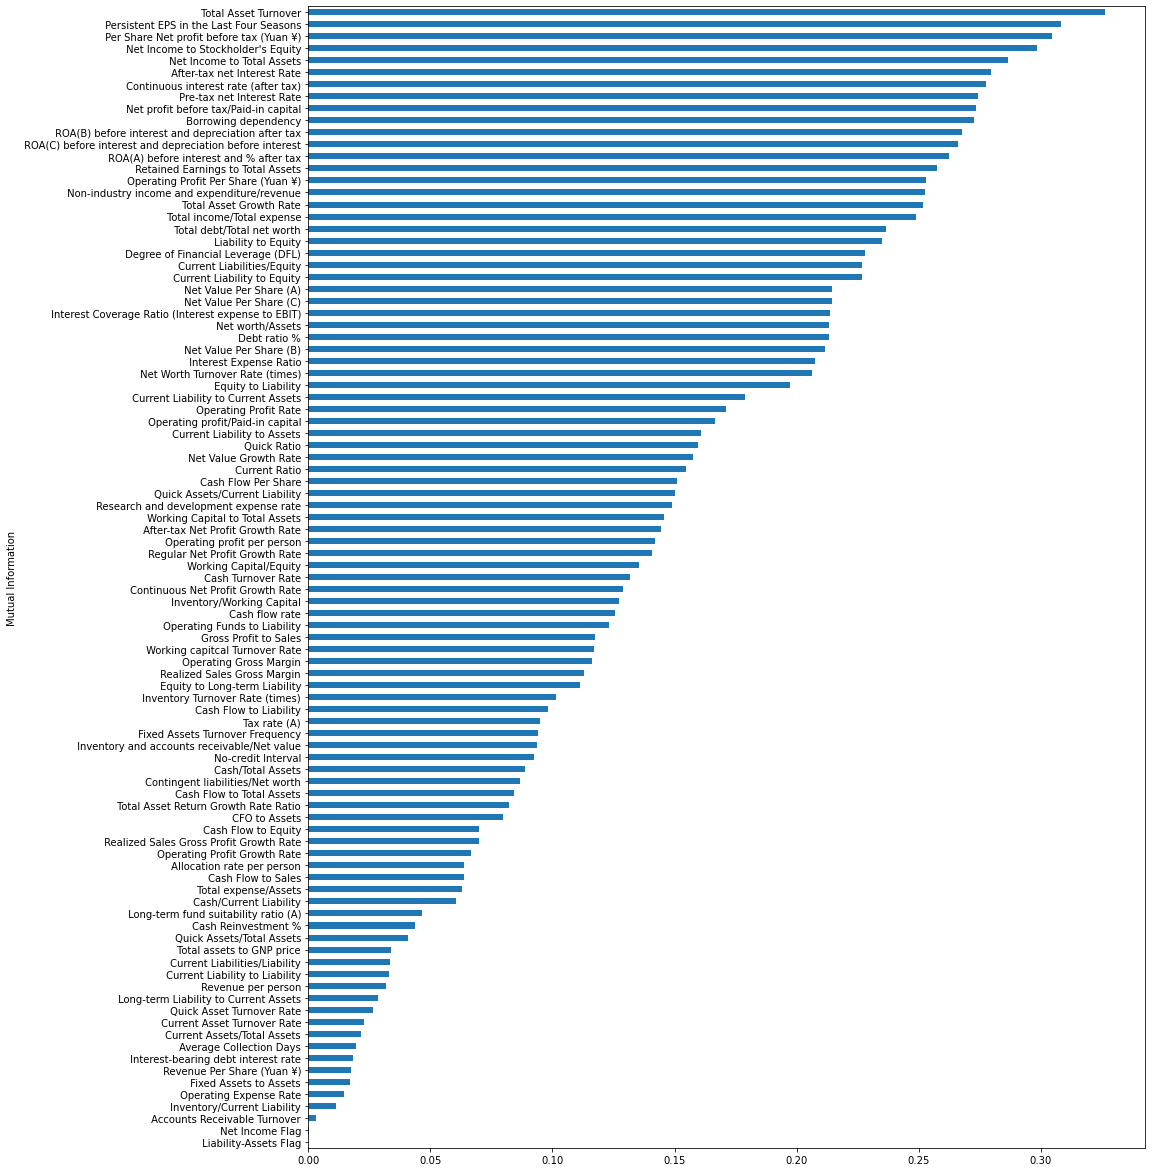

In [15]:
mi = pd.Series(mi)
mi.index = Xm_train.columns
mi.sort_values().plot.barh(figsize=(15, 21))
plt.ylabel('Mutual Information')

In [16]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(Xm_train, ym_train)

# display features
Xm_train.columns[sel_.get_support()]

Index([' Continuous interest rate (after tax)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets',
       ' Net Income to Stockholder's Equity', ' Equity to Liability'],
      dtype='object')

# PCA

### Ideal No. of Components (Dimensions)

In [17]:
pca = PCA(random_state=42)
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [18]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(
    data.drop(labels=['Bankrupt?'], axis=1),
    data['Bankrupt?'],
    test_size=0.3,
    random_state=0)

Xp_train.shape, Xp_test.shape

((4773, 95), (2046, 95))

### Transformation

In [19]:
pca = PCA(n_components=0.95)
Xp = pca.fit_transform(X)

In [20]:
pca.n_components_

8

In [21]:
np.sum(pca.explained_variance_ratio_)

0.979580230982458

# LOGISTIC REGRESSION

## Logistic Regression with PCA

### DATA SCALING AND SPLITTING

In [22]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(Xp)

In [23]:
# from sklearn.model_selection import train_test_split
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y, test_size = 0.2, random_state = 42)
Xp_train.shape,Xp_test.shape, yp_train.shape, yp_test.shape

((5455, 8), (1364, 8))

### REGRESSION MODEL

In [24]:
# from sklearn.linear_model import LogisticRegression
glm1 = LogisticRegression(solver="lbfgs", random_state = 42)
glm1.fit(Xp_train, yp_train)

LogisticRegression(random_state=42)

In [25]:
# from sklearn.metrics import confusion_matrix, accuracy_score
glm1_pred = glm1.predict(Xp_test)
cm = confusion_matrix(yp_test, glm1_pred)
print(cm)
glm1_pred_proba = glm1.predict_proba(Xp_test)[::,1]
auc = metrics.roc_auc_score(yp_test, glm1_pred_proba)

[[756 557]
 [ 17  34]]


In [26]:
print(f"Regression AUC is: {auc}")

Regression AUC is: 0.6367098248286366


In [27]:
print('intercept ', glm1.intercept_[0])
pd.DataFrame({'coeff': glm1.coef_[0]})

intercept  -1.770183153019493e-18


coeff
0 -1.307253e-12
1 -5.998452e-13
2 -1.102195e-11
3 -2.006114e-11
4  3.318490e-12
5  1.945698e-12
6  2.388351e-11
7 -4.805209e-12

## Logistic Regression Using SMOTE/Undersampling

### DATA SCALING

In [28]:
sc = StandardScaler()
Xscaled_train = sc.fit_transform(Xs_train)

### RFE IMPLEMENTATION

In [29]:
#from sklearn.feature_selection import RFE, RFECV

logreg = LogisticRegression(solver="saga", max_iter=6000, random_state=42)
rfe = RFE(logreg, n_features_to_select=21)
rfe = rfe.fit(Xscaled_train, ys_train)
print(rfe.support_)
print(rfe.ranking_)
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

[False  True False False False  True False False False False False False
  True False False  True False  True  True False False  True False False
 False False False False False False False False  True False False  True
  True  True False  True False  True False  True False False False False
 False False False False False  True False False  True False False False
  True False False False False False False False False False False False
 False  True False False False False False False  True False False False
 False  True False False False False False False False False  True]
[13  1 36 15 16  1 19 54 32 52 55 53  1 65 71  1 42  1  1  5 20  1  9 34
 29 60 28 48 47 61 22 50  1 33 69  1  1  1 59  1 63  1 25  1  4  7 12 24
 17 21  8 68 44  1 46 27  1 66 64 10  1 74 58 11 31 51 73 57 62 38 43 30
 40  1 23 49  3 45  2 37  1  6 56 26 18  1 39 67 35 14 72 41 70 75  1]
Column: 0, Selected False, Rank: 13.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 36.000
Column: 3, Se

In [30]:
valid_columns =[]
for i in range(X.shape[1]):
    if rfe.support_[i]:
        valid_columns.append(column_list[i])

In [31]:
X_logistic=Xs_train[valid_columns]
y_logistic=ys_train
Xlog_test=Xs_test[valid_columns]
ylog_test=ys_test

In [32]:
glm2 = LogisticRegression(solver="saga", max_iter=6000, random_state=42)
glm2.fit(X_logistic, y_logistic)

LogisticRegression(max_iter=6000, random_state=42, solver='saga')

In [33]:
pd.DataFrame(zip(Xs_train.columns, np.transpose(glm1.coef_)), columns=['features', 'coef']) 

features  \
0   ROA(C) before interest and depreciation befor...   
1             ROA(A) before interest and % after tax   
2   ROA(B) before interest and depreciation after...   
3                             Operating Gross Margin   
4                        Realized Sales Gross Margin   
5                              Operating Profit Rate   
6                          Pre-tax net Interest Rate   
7                        After-tax net Interest Rate   

                        coef  
0  [-1.3072526906531172e-12]  
1    [-5.99845188077536e-13]  
2   [-1.102195392721235e-11]  
3  [-2.0061140479589007e-11]  
4   [3.3184904940912984e-12]  
5    [1.945698124386391e-12]  
6   [2.3883510828360624e-11]  
7   [-4.805208837572466e-12]

In [34]:
print(f"Regression AUC is: {auc}")

Regression AUC is: 0.6367098248286366


# KNN

## KNN With PCA

In [35]:
#from sklearn.neighbors import KNeighborsClassifier
kmodel1 = KNeighborsClassifier(n_neighbors = 5)
kmodel1.fit(Xp_train, yp_train)

KNeighborsClassifier()

In [36]:
kmodel1_pred = kmodel1.predict(Xp_test)
kmodel1_pred_prob = kmodel1.predict_proba(Xp_test)

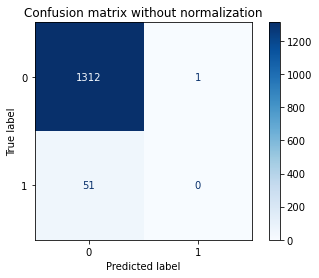

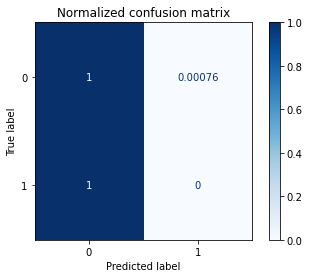

In [37]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(kmodel1, Xp_test, yp_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [38]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
# from sklearn import metrics


print("AUC score of unoptimised K-Nearest Neighbor:", roc_auc_score(yp_test, kmodel1_pred_prob[:,1]))

AUC score of unoptimised K-Nearest Neighbor: 0.6528829353523586


## KNN With SMOTE/Undersampling

In [39]:
#from sklearn.neighbors import KNeighborsClassifier
kmodel2 = KNeighborsClassifier(n_neighbors = 5)
kmodel2.fit(Xs_train, ys_train)

KNeighborsClassifier()

In [40]:
kmodel_pred2 = kmodel2.predict(Xs_test)
kmodel_pred_prob2 = kmodel2.predict_proba(Xs_test)

In [41]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
# from sklearn import metrics

print("AUC score of unoptimised K-Nearest Neighbor:", roc_auc_score(ys_test, kmodel_pred_prob2[:,1]))

AUC score of unoptimised K-Nearest Neighbor: 0.7024442359808214


### Optimization

In [42]:
params = list(range(7,30))

In [43]:
grid_search = GridSearchCV(cv = 5, estimator = KNeighborsClassifier(), param_grid = {'n_neighbors': params, 
                                                                'metric':["manhattan", "euclidean", "minkowski"]},
                          n_jobs = 6, scoring = 'roc_auc', verbose =1)
grid_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 69 candidates, totalling 345 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                         17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                                         27, 28, 29]},
             scoring='roc_auc', verbose=1)

In [44]:
print("Best parameters for K-Nearest Neighbor: {}".format(grid_search.best_params_))
print("Best cross-validation score for K-Nearest Neighbor: {:.2f}".format(grid_search.best_score_))

Best parameters for K-Nearest Neighbor: {'metric': 'manhattan', 'n_neighbors': 7}
Best cross-validation score for K-Nearest Neighbor: 0.96


In [45]:
optimal_KNN_model = KNeighborsClassifier(**grid_search.best_params_)

optimal_KNN_model.fit(Xs_train, ys_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [46]:
optimalKNN_pred = optimal_KNN_model.predict(Xs_test)
optimalKNN_pred_prob = optimal_KNN_model.predict_proba(Xs_test)

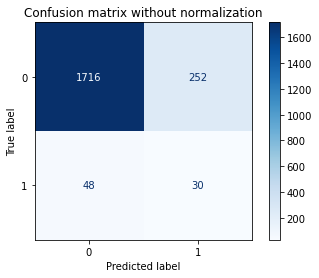

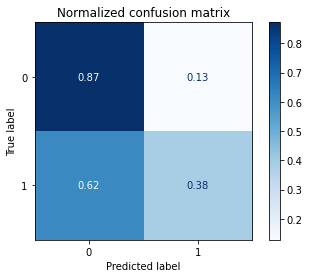

In [47]:
# from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimal_KNN_model, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [48]:
print("AUC score of optimised K-Nearest Neighbor:", roc_auc_score(ys_test, optimalKNN_pred_prob[:,1]))

AUC score of optimised K-Nearest Neighbor: 0.7015810662914321


# SVM

## SVM With PCA

In [49]:
# from sklearn.svm import SVC
svm1 = SVC(random_state = 42)
svm1.fit(Xp_train, yp_train)

SVC(random_state=42)

In [50]:
svm1_pred = svm1.predict(Xp_test)

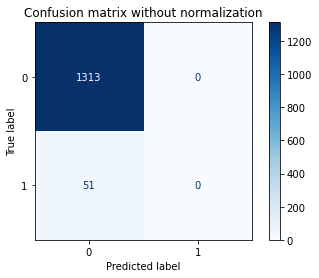

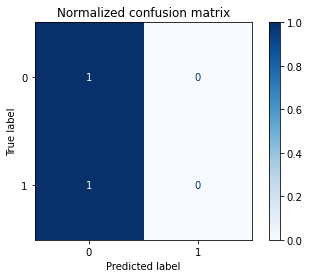

In [51]:
# from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(svm1, Xp_test, yp_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [52]:
print("AUC score of unoptimised Support Vector Machine:", roc_auc_score(yp_test,svm1_pred))

AUC score of unoptimised Support Vector Machine: 0.5


## SVM With SMOTE/Undersampling

In [53]:
svm2 = SVC()
svm2.fit(Xs_train, ys_train)

SVC()

In [54]:
svm_pred2 = svm2.predict(Xs_test)

In [55]:
print("AUC score of unoptimised SVM:", roc_auc_score(ys_test, svm_pred2))

AUC score of unoptimised SVM: 0.6376055347091932


### Optimization

In [56]:
grid_search = GridSearchCV(SVC(), param_grid = {'C': [0.001, 0.1, 0.5, 1, 10],
              'probability': [True]}, cv=5, n_jobs=5,
            return_train_score=True, scoring='roc_auc', verbose=2)

In [57]:
grid_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 10], 'probability': [True]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [58]:
print("Best parameters for Support Vector Machine: {}".format(grid_search.best_params_))
print("Best cross-validation score for Support Vector Machine: {:.2f}".format(grid_search.best_score_))

Best parameters for Support Vector Machine: {'C': 10, 'probability': True}
Best cross-validation score for Support Vector Machine: 0.91


In [59]:
optimal_svm_model = SVC(**grid_search.best_params_)

optimal_svm_model.fit(Xs_train, ys_train)

SVC(C=10, probability=True)

In [60]:
optimalsvm_pred = optimal_svm_model.predict(Xs_test)

In [61]:
print("AUC score of optimised SVM:", roc_auc_score(ys_test, optimalsvm_pred))

AUC score of optimised SVM: 0.6551946529080676


In [62]:
#from sklearn.inspection import permutation_importance
#import numpy as np
#import matplotlib.pyplot as plt

perm_importance = permutation_importance(optimal_svm_model, Xs_test, ys_test)
feature_names = column_list
features = np.array(feature_names)

Text(0.5, 0, 'Permutation Importance')

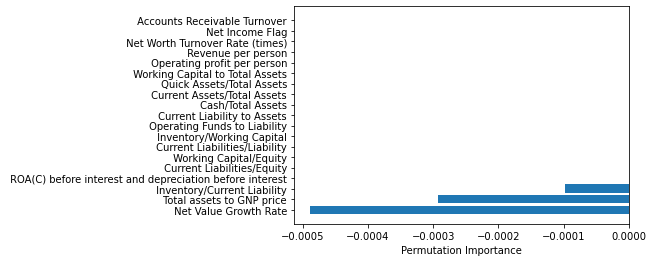

In [63]:
sorted_idx = perm_importance.importances_mean.argsort()[::][:19]

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

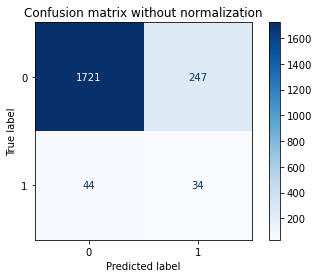

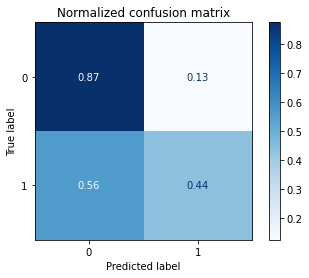

In [64]:
# from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimal_svm_model, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

# NAÏVE-BAYES

## Naïve-Bayes with PCA

In [65]:
# from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [66]:
gnb_model = gnb.fit(Xp_train, yp_train)

In [67]:
gnb_pred1 = gnb_model.predict(Xp_test)
gnb_pred_prob1 = gnb_model.predict_proba(Xp_test)

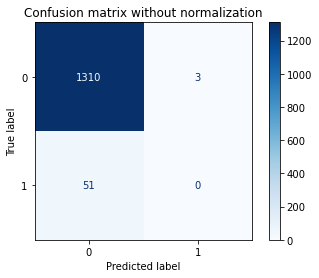

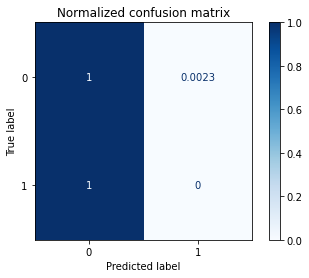

In [68]:
# from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(gnb_model, Xp_test, yp_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [69]:
print("AUC score for unoptimised Gaussian naïve-bayes:", roc_auc_score(yp_test, gnb_pred_prob1[:,1]))

AUC score for unoptimised Gaussian naïve-bayes: 0.6595433298986008


## Naïve-Bayes with SMOTE/Undersampling

In [70]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [71]:
gnb_model1 = gnb.fit(Xs_train, ys_train)
mnb_model1 = mnb.fit(Xs_train, ys_train)

In [72]:
gnb_pred2 = gnb_model1.predict(Xs_test)
gnb_pred_prob2 = gnb_model1.predict_proba(Xs_test)
mnb_pred2 = mnb_model1.predict(Xs_test)
mnb_pred_prob2 = mnb_model1.predict_proba(Xs_test)

In [73]:
print("AUC score for unoptimised Gaussian naïve-bayes:", roc_auc_score(ys_test, gnb_pred2))

AUC score for unoptimised Gaussian naïve-bayes: 0.503381019387117


In [74]:
print("AUC score for unoptimised Multinomial naïve-bayes:", roc_auc_score(ys_test, mnb_pred2))

AUC score for unoptimised Multinomial naïve-bayes: 0.5940236085053158


### Optimization

In [75]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(GaussianNB(), param_grid = params_NB, cv=6,
                          return_train_score=True, scoring="roc_auc")
grid_search.fit(Xs_train, ys_train)

GridSearchCV(cv=6, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='roc_auc')

In [76]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'var_smoothing': 0.0023101297000831605}
Best cross-validation score: 0.74


In [77]:
optimisedgnb = GaussianNB(**grid_search.best_params_)
optimisedgnb.fit(Xs_train, ys_train)
optimisedgnb_pred = optimisedgnb.predict(Xs_test)
optimisedgnb_pred_prob = optimisedgnb.predict_proba(Xs_test)

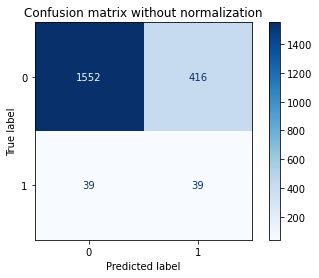

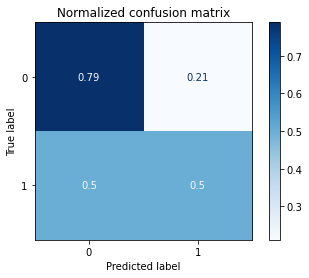

In [78]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimisedgnb, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [79]:
print("AUC score for optimised Gaussian naïve-bayes:", roc_auc_score(ys_test, optimisedgnb_pred_prob[:,1]))

AUC score for optimised Gaussian naïve-bayes: 0.6620869814467376


In [80]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=6,
                          return_train_score=True, scoring="roc_auc")
grid_search.fit(Xs_train, ys_train)

GridSearchCV(cv=6, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='roc_auc')

In [81]:
optimisedmnb = MultinomialNB(**grid_search.best_params_)
optimisedmnb.fit(Xs_train, ys_train)
optimisedmnb_pred = optimisedmnb.predict(Xs_test)
optimisedmnb_pred_prob = optimisedmnb.predict_proba(Xs_test)

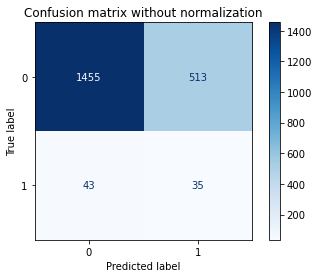

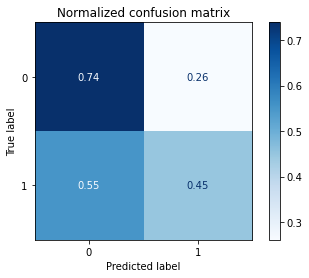

In [82]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimisedmnb, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [83]:
print("AUC score for optimised Multinomial naïve-bayes:", roc_auc_score(ys_test, optimisedmnb_pred_prob[:,1]))

AUC score for optimised Multinomial naïve-bayes: 0.594717401500938


# RANDOM FOREST

## Random Forest With PCA

In [84]:
# from sklearn.ensemble import RandomForestClassifier
rfmodel1 = RandomForestClassifier(random_state = 42)
rfmodel1.fit(Xp_train, yp_train)

RandomForestClassifier(random_state=42)

In [85]:
rfmodel1_pred1 = rfmodel1.predict(Xp_test)
rfmodel1_pred_prob1 = rfmodel1.predict_proba(Xp_test)

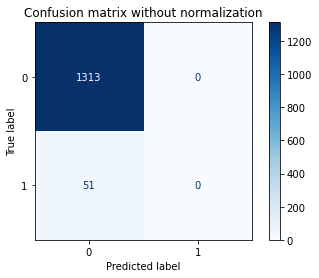

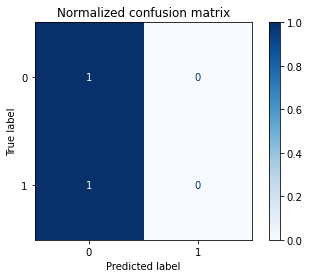

In [86]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(rfmodel1, Xp_test, yp_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [87]:
print("AUC score of unoptimised Random Forest:", roc_auc_score(yp_test, rfmodel1_pred_prob1[:,1]))

AUC score of unoptimised Random Forest: 0.7168137628242461


In [88]:
sorted_f = rfmodel1.feature_importances_.argsort()
# names = feature_names[sorted_f[:19]]
sortedf = sorted_f[:19]

<AxesSubplot:>

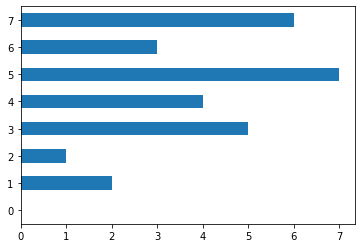

In [89]:
forest_importances = pd.Series(sortedf)

fig, ax = plt.subplots()
forest_importances.plot.barh()

## Random Forest With SMOTE/Undersampling

In [127]:
# from sklearn.ensemble import RandomForestClassifier
rfmodel2 = RandomForestClassifier(random_state = 3)
rfmodel2.fit(Xs_train, ys_train)

RandomForestClassifier(random_state=3)

In [128]:
rfmodel2_pred2 = rfmodel2.predict(Xs_test)
rfmodel2_pred_prob2 = rfmodel2.predict_proba(Xs_test)

In [129]:
print("AUC score of unoptimised Random Forest:", roc_auc_score(ys_test, rfmodel2_pred_prob2[:,1]))

AUC score of unoptimised Random Forest: 0.9450991505107359


<AxesSubplot:>

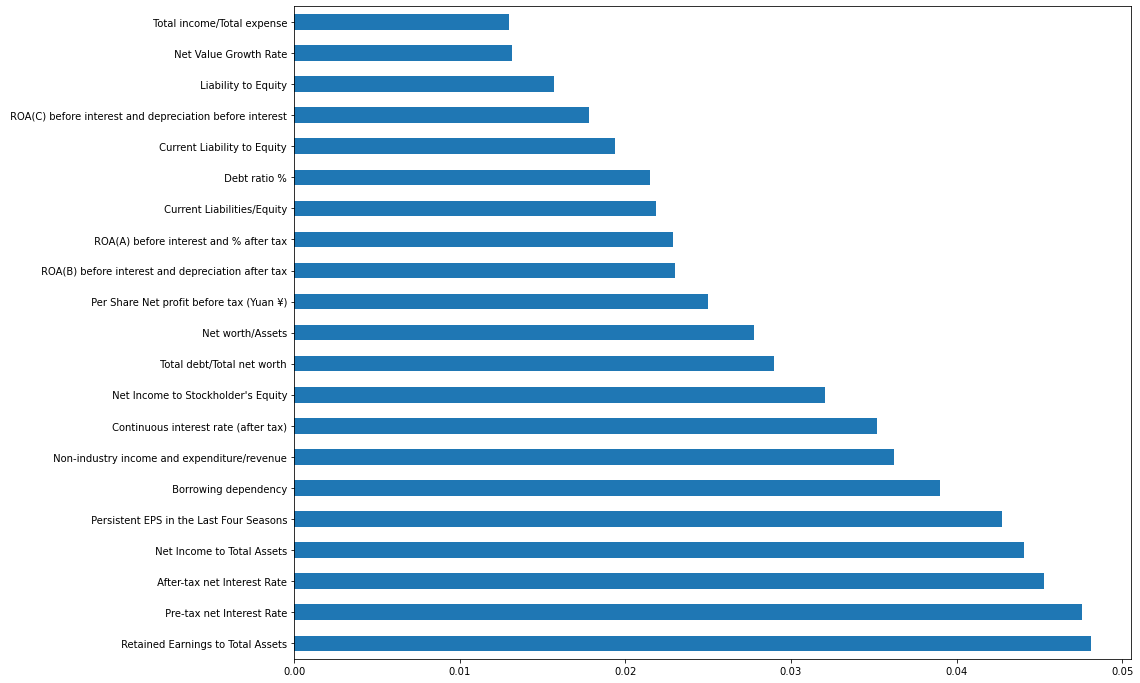

In [130]:
feat_importances = pd.Series(rfmodel2.feature_importances_, index=Xs_train.columns)
feat_importances.nlargest(21).plot(kind='barh', figsize=(15, 12))

### Optimization

In [94]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 6, verbose = 2)

grid_search.fit(Xs_train, ys_train)

Fitting 3 folds for each of 1125 candidates, totalling 3375 fits
[CV] END ..........................C=0.001, probability=True; total time=   4.5s
[CV] END ............................C=0.1, probability=True; total time=   4.6s
[CV] END ............................C=0.5, probability=True; total time=   4.1s
[CV] END ..............................C=1, probability=True; total time=   3.8s
[CV] END .............................C=10, probability=True; total time=   3.1s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   0.9s


[CV] END ..........................C=0.001, probability=True; total time=   4.6s
[CV] END ............................C=0.1, probability=True; total time=   4.6s
[CV] END ............................C=0.5, probability=True; total time=   4.1s
[CV] END ..............................C=1, probability=True; total time=   3.9s
[CV] END .............................C=10, probability=True; total time=   3.1s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples

[CV] END ..........................C=0.001, probability=True; total time=   4.5s
[CV] END ............................C=0.1, probability=True; total time=   4.4s
[CV] END ............................C=0.5, probability=True; total time=   3.9s
[CV] END ..............................C=1, probability=True; total time=   3.8s
[CV] END .............................C=10, probability=True; total time=   3.1s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_

[CV] END ..........................C=0.001, probability=True; total time=   4.5s
[CV] END ............................C=0.1, probability=True; total time=   4.5s
[CV] END ............................C=0.5, probability=True; total time=   4.0s
[CV] END ..............................C=1, probability=True; total time=   3.9s
[CV] END .............................C=10, probability=True; total time=   3.1s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_sample

[CV] END ..........................C=0.001, probability=True; total time=   4.4s
[CV] END ............................C=0.1, probability=True; total time=   4.3s
[CV] END ............................C=0.5, probability=True; total time=   3.8s
[CV] END ..............................C=1, probability=True; total time=   3.7s
[CV] END .............................C=10, probability=True; total time=   2.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.7s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples

[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=4

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_lea

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_lea

[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.1s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf

[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4

[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=

[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=

[CV] END bootstrap=True, max_depth=4, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.7s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_lea

[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   3.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.6s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=4, max_features=3, min_samples_leaf

[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4

[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=

[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   1.9s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4

[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf

[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   2.1s
[CV] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=5, max_features=4, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=4, min_samples_lea

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'bootstrap': [True], 'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500, 1000]},
             verbose=2)

In [95]:
print("Best parameters for Random Forest: {}".format(grid_search.best_params_))
print("Best cross-validation score for Random Forest: {:.2f}".format(grid_search.best_score_))

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}
Best cross-validation score for Random Forest: 0.93


In [106]:
optimal_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state = 3)
optimal_rf_model.fit(Xs_train, ys_train)

RandomForestClassifier(max_depth=6, max_features=6, min_samples_leaf=4,
                       min_samples_split=8, random_state=3)

In [107]:
optimalrf_pred = optimal_rf_model.predict(Xs_test)
optimalrf_pred_prob = optimal_rf_model.predict_proba(Xs_test)

In [108]:
optimal_rf_model.feature_importances_

array([0.02081611, 0.02768361, 0.03407892, 0.00403184, 0.00161521,
       0.01449415, 0.02787757, 0.05787292, 0.04452922, 0.03280915,
       0.00180673, 0.005452  , 0.00220998, 0.01206221, 0.00225321,
       0.011627  , 0.00508112, 0.01484915, 0.0498456 , 0.00111554,
       0.00448708, 0.00512679, 0.01634827, 0.00118715, 0.00239434,
       0.00452612, 0.00505151, 0.00419328, 0.00319709, 0.01352178,
       0.00151937, 0.00120063, 0.00430088, 0.00899767, 0.00622136,
       0.03311579, 0.03182674, 0.02119375, 0.00266192, 0.03135172,
       0.00250544, 0.00506765, 0.00867217, 0.00381842, 0.00300653,
       0.00283158, 0.00471672, 0.00228454, 0.00354476, 0.00227457,
       0.00381227, 0.00715631, 0.00485343, 0.00597232, 0.00284386,
       0.00303987, 0.00327521, 0.00230444, 0.00328917, 0.00953868,
       0.00154774, 0.00408944, 0.00396781, 0.00190157, 0.00203559,
       0.02258869, 0.00531792, 0.04699204, 0.01453105, 0.00359905,
       0.00185124, 0.00170358, 0.00113899, 0.00667635, 0.00250

<AxesSubplot:>

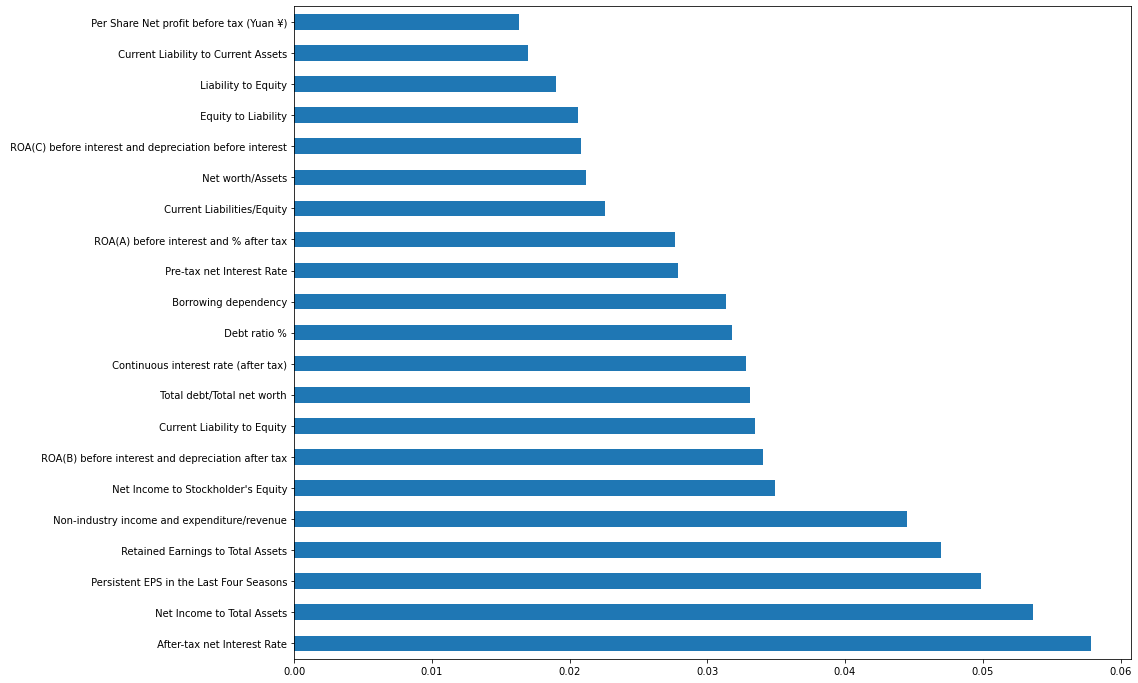

In [109]:
feat_importances = pd.Series(optimal_rf_model.feature_importances_, index=Xs_train.columns)
feat_importances.nlargest(21).plot(kind='barh', figsize=(15, 12))

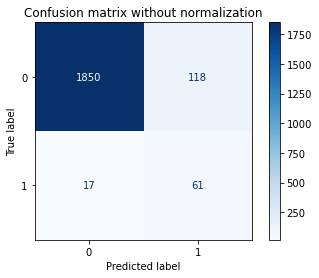

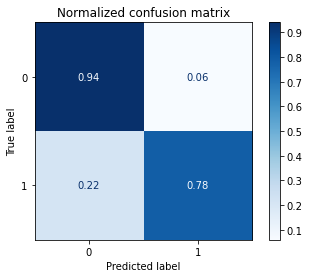

In [110]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(optimal_rf_model, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [111]:
# from sklearn.model_selection import cross_val_score
scores = cross_val_score(optimal_rf_model, Xs_test, ys_test, cv=21, scoring='roc_auc')
print(scores)

[0.96010638 0.96808511 0.92819149 0.97340426 0.93882979 0.93617021
 0.9787234  0.93882979 0.96542553 0.9929078  0.9822695  0.9929078
 0.80141844 0.86524823 0.92198582 0.98655914 0.9327957  0.94623656
 0.91935484 0.97849462 0.98655914]


In [112]:
print("AUC score of optimised Random Forest:", sum(scores)/len(scores))

AUC score of optimised Random Forest: 0.9473573117190138


### LIME For Explanation

In [113]:
from lime import lime_tabular
predict_fn_rf = lambda a: optimal_rf_model.predict_proba(a).astype(float)
Xs = Xs_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(Xs,feature_names = Xs_train.columns,
                                                   class_names=['Not Bankrupt','Bankrupt'],kernel_width=5)

In [114]:
ys_test.loc[[30]]

30    1
Name: Bankrupt?, dtype: int64

In [115]:
choosen_instance = Xs_test.loc[[422]].values[0]
expnb = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
expnb.show_in_notebook(show_all=False)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


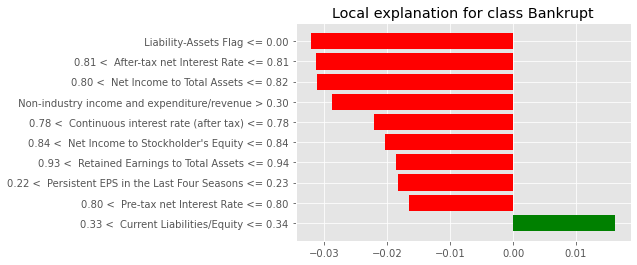

In [116]:
with plt.style.context("ggplot"):
    expnb.as_pyplot_figure()

In [117]:
choosen_instance = Xs_test.loc[[30]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


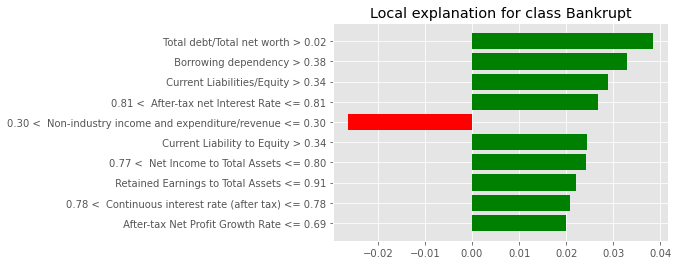

In [118]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

# VOTING CLASSIFIER

## Voting Classifier with PCA 

In [119]:
# from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', glm1), ('rf', rfmodel1), ('nb', gnb_model1), ('svm', svm1), ('knn', kmodel1)],
    voting='hard')

In [120]:
voting_clf.fit(Xp_train, yp_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('nb', GaussianNB()),
                             ('svm', SVC(random_state=42)),
                             ('knn', KNeighborsClassifier())])

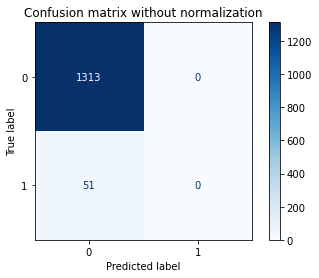

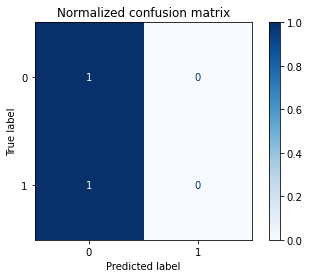

In [121]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(voting_clf, Xp_test, yp_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [122]:
for clf in (glm1, rfmodel1, gnb_model1, svm1, kmodel1, voting_clf):
    clf.fit(Xp_train, yp_train)
    clf_pred = clf.predict(Xp_test)
    print(clf.__class__.__name__, roc_auc_score(yp_test, clf_pred))

LogisticRegression 0.6212236608276211
RandomForestClassifier 0.5
GaussianNB 0.49885757806549885
SVC 0.5
KNeighborsClassifier 0.49961919268849964
VotingClassifier 0.5


## Voting Classifier with SMOTE/Undersampling

In [123]:
# from sklearn.ensemble import VotingClassifier
fvoting_clf = VotingClassifier(
    estimators=[('lr', glm2), ('rf', optimal_rf_model), ('nb', optimisedmnb), ('svm', optimal_svm_model), ('knn', optimal_KNN_model)],
    voting='hard')

In [124]:
fvoting_clf.fit(Xs_train, ys_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=6000, random_state=42,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=6,
                                                     min_samples_leaf=4,
                                                     min_samples_split=8,
                                                     random_state=3)),
                             ('nb', MultinomialNB(alpha=0.001)),
                             ('svm', SVC(C=10, probability=True)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7))])

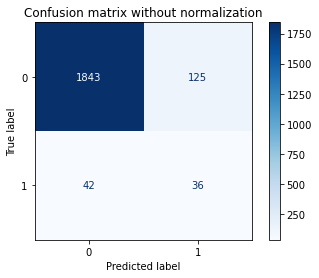

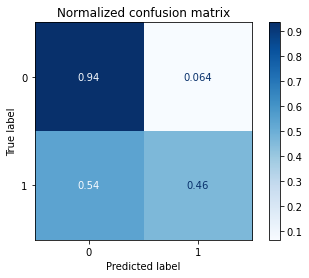

In [125]:
titles_options = [("Confusion matrix without normalization", None), ("Normalized confusion matrix", "true"),]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(fvoting_clf, Xs_test, ys_test, cmap = plt.cm.Blues, normalize=normalize,)
    disp.ax_.set_title(title)

In [126]:
for clf in (glm2, optimal_rf_model, optimisedmnb, optimal_svm_model, optimal_KNN_model, voting_clf):
    clf.fit(Xs_train, ys_train)
    fclf_pred = clf.predict(Xs_test)
    print(clf.__class__.__name__, roc_auc_score(ys_test, fclf_pred))

LogisticRegression 0.5745974046278924
RandomForestClassifier 0.8610459662288931
MultinomialNB 0.5940236085053158
SVC 0.6551946529080676
KNeighborsClassifier 0.6282833020637899


/Users/angadkanvar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.7335248592870544
